#### load in modules

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#### function to generate random graphs using the stochastic block model

In [42]:
def generate_sb_graphs(num_nodes, num_communities, p_intra, p_inter):
    # generate community sizes and probability matrix
    community_sizes = np.random.multinomial(num_nodes, [1.0 / num_communities] * num_communities)
    p_matrix = [[p_intra if i == j else p_inter for j in range(num_communities)] for i in range(num_communities)]

    # ensure that the graph is connected
    while True:
        G = nx.stochastic_block_model(community_sizes, p_matrix)
        if nx.is_connected(G):
            break

    return G

#### generate random SB graphs (low-modularity)

In [43]:
# params
num_nodes = 160
num_communities = 5
p_intra = 0.08
p_inter = 0.005

# generate graph
sb_low_mod_G = generate_sb_graphs(num_nodes, num_communities, p_intra, p_inter)

In [50]:
# extract community labels
sb_low_mod_communities = [0] * num_nodes
for i, c in enumerate(nx.get_node_attributes(sb_low_mod_G, 'block').values()):
    sb_low_mod_communities[i] = c    

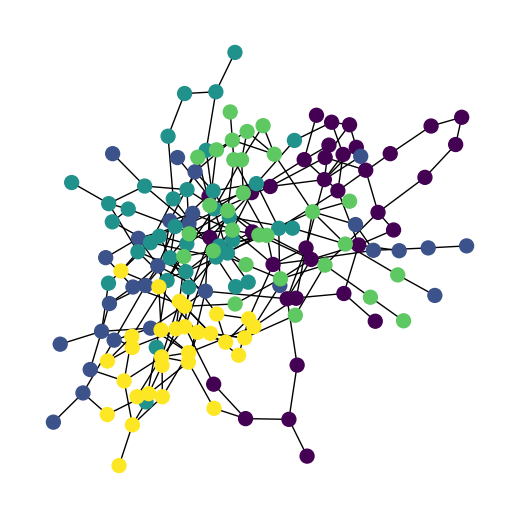

In [53]:
# draw graph
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(sb_low_mod_G)
# colour nodes according to their community
node_colors = [sb_low_mod_G.nodes[node]['block'] for node in sb_low_mod_G.nodes]
nx.draw(sb_low_mod_G, pos, node_color=node_colors, with_labels=False, node_size=100)
plt.show()

In [59]:
# export graph as adjlist
nx.write_adjlist(sb_low_mod_G, 'SB-low_modularity.adjlist')

# export community labels
with open('SB-low_modularity.membership.csv', 'w+') as f:
    f.write('node,community\n')
    for i, c in enumerate(sb_low_mod_communities):
        f.write(f'{i},{c}\n')

#### generate random SB graphs (high-modularity)

In [37]:
# params
num_nodes = 160
num_communities = 5
p_intra = 0.14
p_inter = 0.001

# generate graph
sb_high_mod_G = generate_sb_graphs(num_nodes, num_communities, p_intra, p_inter)

In [56]:
# extract community labels
sb_high_mod_communities = [0] * num_nodes
for i, c in enumerate(nx.get_node_attributes(sb_high_mod_G, 'block').values()):
    sb_high_mod_communities[i] = c

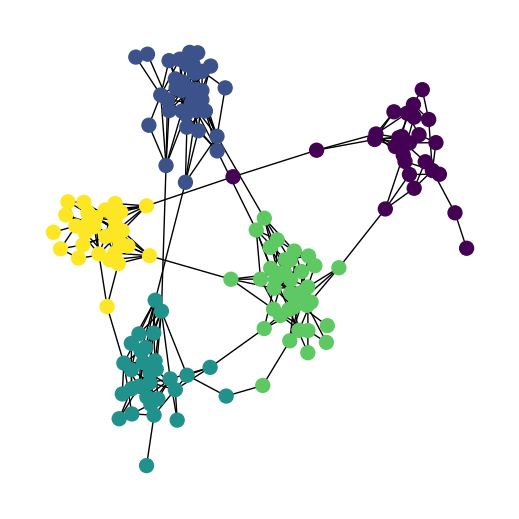

In [57]:
# draw graph
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(sb_high_mod_G)
# colour nodes according to their community
node_colors = [sb_high_mod_G.nodes[node]['block'] for node in sb_high_mod_G.nodes]
nx.draw(sb_high_mod_G, pos, node_color=node_colors, with_labels=False, node_size=100)
plt.show()

In [58]:
# export graph as adjlist
nx.write_adjlist(sb_high_mod_G, 'SB-high_modularity.adjlist')

# export community labels
with open('SB-high_modularity.membership.csv', 'w+') as f:
    f.write('node,community\n')
    for i, c in enumerate(sb_high_mod_communities):
        f.write(f'{i},{c}\n')